##Transition matrix

In [571]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib notebook

In [572]:
n=27
A=zero_matrix(QQ,n);     

In [573]:
for i in range(6):
    A[0,i+1]=1/6
A[n-1,n-1]=1;    
for i in range(1,n-1):
    score = i
    for j in range(6):
        roll=j+1
        if score + roll in list(primes(1,n)):
            if score-roll <= 0:
                A[i,0]+=1/6
            else:
                A[i,score-roll]+=1/6
        else:
            if score + roll >= n:
                A[i,n-1]+=1/6
            else:
                A[i,score+roll]+=1/6
            
        
        

In [574]:
B=A^7
print(B[0,-1])
print(CC(B[0,-1]))
print(1-B[0,-1])
CC(1-B[0,-1])

29839/279936
0.106592221079104
250097/279936


0.893407778920896

In [575]:
sum_1=0
for i in range(n):
    for j in range(n):
        sum_1 += A[i,j]
sum_1

27

In [576]:
Q=A[0:-1,0:-1]

In [577]:
Q.str()

'[  0 1/6 1/6 1/6 1/6 1/6 1/6   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]\n[2/3   0   0   0 1/6   0 1/6   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]\n[1/3 1/6   0   0 1/6   0 1/6   0 1/6   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]\n[1/6 1/6   0   0 1/6   0 1/6   0 1/6 1/6   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]\n[  0 1/6   0 1/6   0   0 1/6   0 1/6 1/6 1/6   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]\n[1/6   0   0 1/6   0   0 1/6   0 1/6 1/6 1/6   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]\n[  0 1/6   0   0   0 1/6   0   0 1/6 1/6 1/6   0 1/6   0   0   0   0   0   0   0   0   0   0   0   0   0]\n[  0 1/6   0 1/6   0   0   0   0 1/6 1/6 1/6   0 1/6   0   0   0   0   0   0   0   0   0   0   0   0   0]\n[  0   0   0 1/6   0 1/6   0   0   0 1/6 1/6   0 1/6   0 1/6   0   0   0   0   0   0   0   0   0   0   0]\n[  0   0   0   0   0 1/6   0 1/6   0

In [578]:
I = matrix.identity(n-1)

In [579]:
N=(I-Q)
N=N.inverse()

In [580]:
sum_2=0
for j in range(n-1):
    sum_2 += N[0,j]
print(sum_2)
print(CC(sum_2))

1888114326143690885/124917931460431158
15.1148382307449


In [581]:
import numpy as np
import random

In [582]:
games=1 # number of games simulated
means = []
for i in range(games):
    score = 0
    roll=0
    while score < n-1:
        roll+=1
        die_value = random.randint(1,6)
        if score == 0:
            score = die_value
        elif score + die_value in list(primes(1,n-1)):
            if score - die_value <=0:
                score = 0
            else: 
                score = score-die_value
        else:
            score = score + die_value
    means.append(roll)


In [583]:
CC(mean(means))

8.00000000000000

In [584]:
x=np.array([10,26,50,100,150,200])
expected=np.array([4.24,15.11,28.79,53.10,78.45,104.45])

<IPython.core.display.Javascript object>


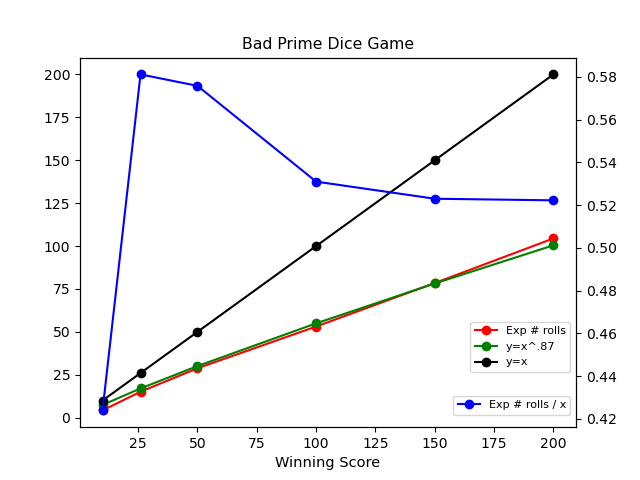

In [585]:
fig, ax =plt.subplots()

In [586]:
ax.plot(x,expected, 'ro-', label = "Exp # rolls")
ax.plot(x,+x^.87, 'go-', label="y=x^.87")
ax.plot(x,x, 'ko-', label="y=x")

In [587]:
ax2=ax.twinx()
ax2.plot(x, (expected/x), 'bo-', label= "Exp # rolls / x")

In [588]:
ax.set_xlabel('Winning Score', fontsize = 10.5)
ax.set_title('Bad Prime Dice Game', fontsize = 11.3)
ax.legend(bbox_to_anchor = (1,.30), prop = {'size':8})
ax2.legend(bbox_to_anchor = (1,.1), prop = {'size':8})

In [589]:
fig.savefig("bad_prime_plot_3")